In [1]:
import pandas as pd

import nltk
import string

tokens_blocked = (
    set(nltk.corpus.stopwords.words('english'))
        | set(string.punctuation)
)

tokens = nltk.corpus.genesis.words('english-kjv.txt')

df_tokens = pd.Series(filter(lambda x: x not in tokens_blocked, tokens))
df_token_freqs = df_tokens.value_counts()

df_token_freqs_ = pd.DataFrame({
    'token': df_token_freqs.index,
    'frequency': df_token_freqs.values
})
df_token_freqs_

,token,frequency
0,And,1250
1,unto,590
2,I,484
3,said,476
4,thou,272
...,...,...
2656,half,1
2657,golden,1
2658,wit,1
2659,wondering,1


In [2]:
import matplotlib.pyplot as plt

from tagcloud import (
    TagCloud,
    DescendingFrequencyTable,
    FrequencyData,
    graphics
)
from tagcloud.backends.backend_pil import CanvasPIL

In [3]:
wc = TagCloud(canvas_backend=CanvasPIL)

In [10]:
#%%capture

# TODO normalize

import cProfile
with cProfile.Profile() as pr:
    c, layout = wc.draw(
        frequency_table=DescendingFrequencyTable.from_dataframe(df_token_freqs_),#.head(10),
        text_props=dict(
            #size_max=200,
            #rotation_range=(0, 0),
            #rotation_step=90,
            rotation_prob=.1
        ),
        canvas_props=dict(size=graphics.Dimension(200, 400))
    )
    
    pr.print_stats(sort='time')


progress And 1.0
progress unto 0.472
progress And 1.0
progress unto 0.472
progress I 0.3872
progress said 0.3808
progress thou 0.2176
progress thy 0.2136
progress thee 0.2056
progress shall 0.2024
progress God 0.1848
progress father 0.1584
progress land 0.1472
progress Jacob 0.1432
progress came 0.1416
progress LORD 0.1328
progress Joseph 0.1256
progress son 0.1216
progress sons 0.1136
progress upon 0.1112
progress Abraham 0.1032
progress man 0.0912
progress earth 0.0888
progress went 0.088
progress wife 0.0832
progress years 0.0816
progress name 0.08
progress called 0.0784
progress us 0.0744
progress brother 0.0728
progress Pharaoh 0.072
progress every 0.0704
progress ye 0.0696
progress house 0.0656
progress hand 0.0656
progress took 0.0648
progress pass 0.0648
progress also 0.0648
progress brethren 0.064
progress hath 0.064
progress saying 0.0632
progress Isaac 0.0616
progress Egypt 0.0592
progress Esau 0.0592
progress shalt 0.0584
progress made 0.0576
progress day 0.0568
progress on

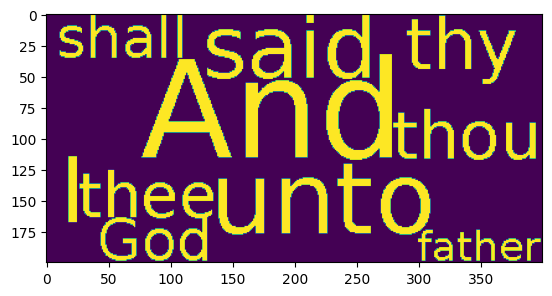

In [6]:
_ = plt.imshow(c.data_bool)

In [8]:
#%%capture

#!pip install --force-reinstall wordcloud

import wordcloud
import nltk

t = nltk.corpus.genesis.open('english-kjv.txt').read()

import cProfile
with cProfile.Profile() as pr:
    wordcloud.WordCloud(
        background_color=None, 
        mode='RGBA', 
        prefer_horizontal=1.
    ).generate(t).to_image()
    pr.print_stats(sort='time')

progress unto 1.0
try init 200 None
elapsed 0:00:00.016326
progress son 0.7758620689655172
try init 147 None
elapsed 0:00:00.031343
layout len 2
progress unto 1.0
try init 107 None
elapsed 0:00:00.000489
progress son 0.7758620689655172
try init 95 None
elapsed 0:00:00.009413
progress said 0.6666666666666666
try init 71 None
elapsed 0:00:00.002162
progress land 0.5287356321839081
try init 61 None
elapsed 0:00:00.000606
progress thee 0.514367816091954
try init 60 None
elapsed 0:00:00.004850
progress Jacob 0.514367816091954
try init 51 None
elapsed 0:00:00.006762
progress said unto 0.514367816091954
try init 39 None
elapsed 0:00:00.004614
progress thy 0.5086206896551724
try init 31 None
elapsed 0:00:00.000564
progress father 0.4885057471264368
try init 30 None
elapsed 0:00:00.000541
progress came 0.4827586206896552
try init 30 None
elapsed 0:00:00.000563
progress LORD 0.45977011494252873
try init 29 None
elapsed 0:00:00.000736
progress Joseph 0.4511494252873563
try init 29 None
elapsed 0:

: 

: 

: 

: 